In [1]:
import netket as nk
import json
import numpy as np
import matplotlib.pyplot as plt
from time import time
import jax.numpy as jnp
from pathlib import Path
from Hamiltonians import Kitaev
from Utils import draw_kitaev_honeycomb

1 - HeisenbergChain
First for 18 spins, then we try to simulate as big system as possible

In [7]:
res_path = Path('./Simulations/2-GroundStateVMC')
L = 20
alpha = 1
Sz = 0
lr = 0.01
n_iter = 500

In [26]:
chain = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=0, N=chain.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=chain, J=1)

In [27]:
rbm = nk.models.RBM(alpha=alpha, param_dtype=jnp.float32)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
optimizer = nk.optimizer.Sgd(learning_rate=0.01)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=800)

In [28]:
gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, preconditioner=sr, variational_state=vstate)

start = time()
gs.run(n_iter=n_iter, out=(chain_path := f'{res_path}/HeisenbergChain/N{chain.n_nodes}'
                          f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 24.045 seconds


In [29]:
exact_gs = nk.exact.lanczos_ed(hamiltonian, k=1, compute_eigenvectors=False)[0]
exact_gs

-35.61754611950568

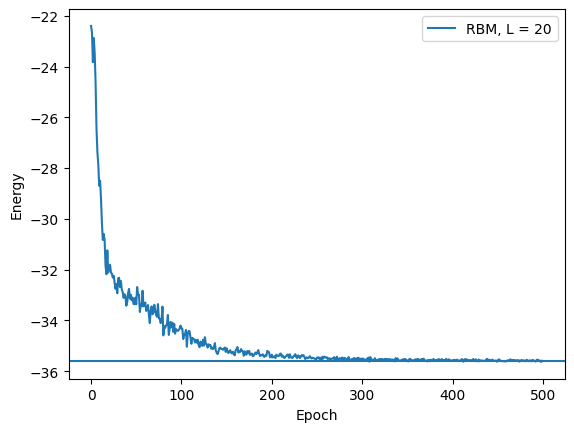

In [30]:
data_chain = json.load(open(f'{chain_path}.log'))
figure, axes = plt.subplots(1, 1)
axes.plot(data_chain['Energy']['iters'], data_chain['Energy']['Mean'], label=f'RBM, L = {L}')
axes.axhline(y=exact_gs)
axes.set(xlabel='Epoch', ylabel='Energy')
axes.legend();

Training large model

In [62]:
L = 40
alpha = 2
Sz = 0
lr = 0.01
n_iter = 1500

In [63]:
chain = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=0, N=chain.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=chain, J=1)
rbm = nk.models.RBM(alpha=alpha, param_dtype=jnp.float32)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
optimizer = nk.optimizer.Sgd(learning_rate=0.01)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=800)

In [64]:
gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, preconditioner=sr, variational_state=vstate)
start = time()
gs.run(n_iter=n_iter, out=(chain_path := f'{res_path}/HeisenbergChain/N{chain.n_nodes}'
                          f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/1500 [00:00<?, ?it/s]

Time: 354.886 seconds


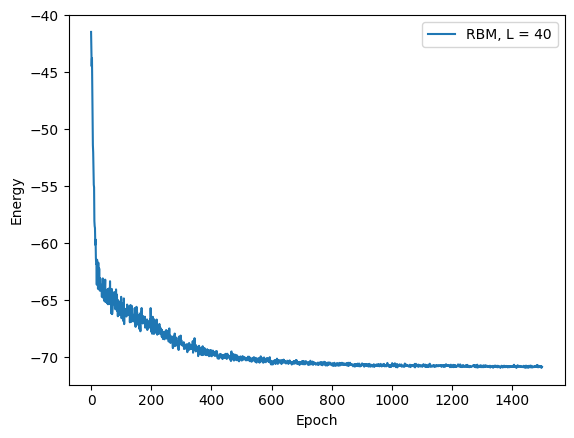

In [65]:
data_chain = json.load(open(f'{chain_path}.log'))
figure, axes = plt.subplots(1, 1)
axes.plot(data_chain['Energy']['iters'], data_chain['Energy']['Mean'], label=f'RBM, L = {L}')
axes.set(xlabel='Epoch', ylabel='Energy')
axes.legend();

Now we test for Heisenberg Honeycomb

In [76]:
alpha = 1
Sz = 0
lr = 0.01
n_iter = 1500

<Axes: >

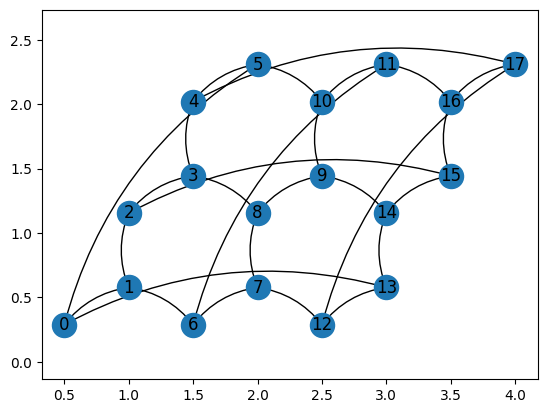

In [77]:
honey = nk.graph.Honeycomb(extent=[3, 3], pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=0, N=honey.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
honey.draw()

In [78]:
rbm = nk.models.RBM(alpha=alpha, param_dtype=jnp.float32)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey)
optimizer = nk.optimizer.Sgd(learning_rate=0.01)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=800)

In [79]:
gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, preconditioner=sr, variational_state=vstate)
start = time()
gs.run(n_iter=n_iter, out=(honey_path := f'{res_path}/HeisenbergHoneycomb/N{chain.n_nodes}'
                          f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/1500 [00:00<?, ?it/s]

Time: 124.711 seconds


In [80]:
exact_gs = nk.exact.lanczos_ed(hamiltonian, k=1, compute_eigenvectors=False)[0]
exact_gs

-40.388663346019484

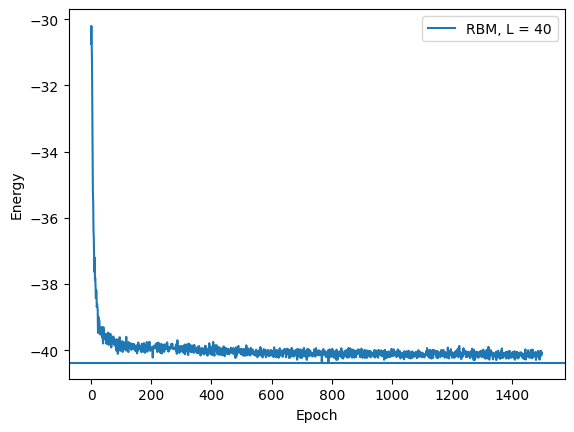

In [81]:
data_honey = json.load(open(f'{honey_path}.log'))
figure, axes = plt.subplots(1, 1)
axes.plot(data_honey['Energy']['iters'], data_honey['Energy']['Mean'], label=f'RBM, L = {L}')
axes.axhline(y=exact_gs)
axes.set(xlabel='Epoch', ylabel='Energy')
axes.legend();

<Axes: >

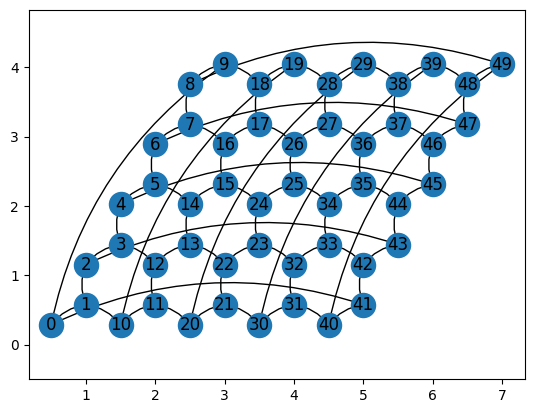

In [84]:
alpha = 2
n_iter = 2000
honey = nk.graph.Honeycomb(extent=[5, 5], pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=0, N=honey.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
honey.draw()

In [85]:
rbm = nk.models.RBM(alpha=alpha, param_dtype=jnp.float32)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey)
optimizer = nk.optimizer.Sgd(learning_rate=0.01)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=800)

In [86]:
gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, preconditioner=sr, variational_state=vstate)
start = time()
gs.run(n_iter=n_iter, out=(honey_path := f'{res_path}/HeisenbergHoneycomb/N{chain.n_nodes}'
                          f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/2500 [00:00<?, ?it/s]

Time: 952.972 seconds


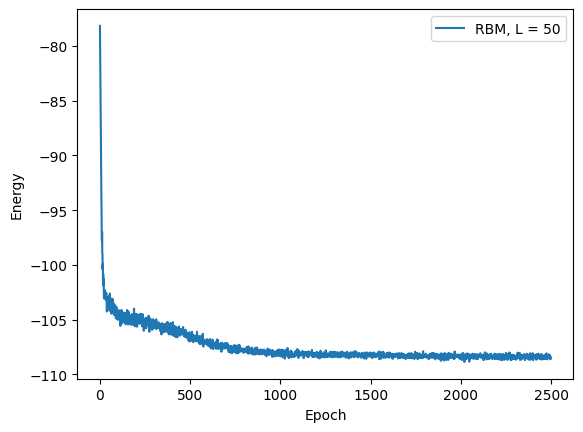

In [88]:
data_honey = json.load(open(f'{honey_path}.log'))
figure, axes = plt.subplots(1, 1)
axes.plot(data_honey['Energy']['iters'], data_honey['Energy']['Mean'], label=f'RBM, L = {honey.n_nodes}')
axes.set(xlabel='Epoch', ylabel='Energy')
axes.legend();

Kitaev Honeycomb

In [47]:
alpha = 3
Sz = None
lr = 0.01
shift = 0.005
n_iter = 1500
J = 0.1, 0.1, 0.8

<Axes: >

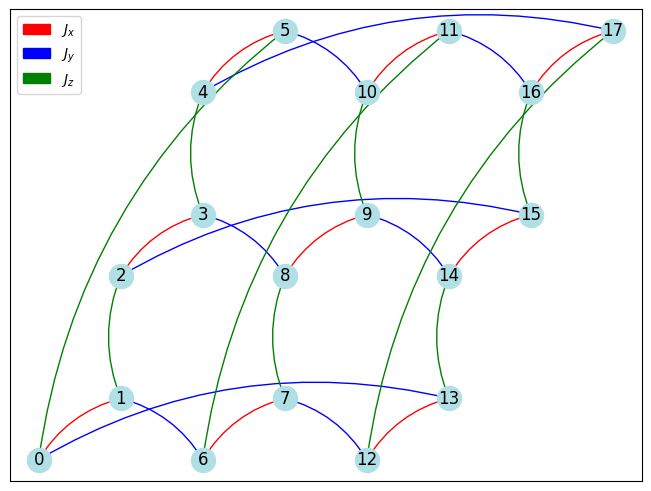

In [48]:
kitaev = nk.graph.KitaevHoneycomb(extent=[3, 3], pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=kitaev.n_nodes)
hamiltonian = Kitaev(hilbert, kitaev, J=J)
draw_kitaev_honeycomb(kitaev)

In [49]:
rbm = nk.models.RBM(alpha=alpha, param_dtype=jnp.float32)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=kitaev)
optimizer = nk.optimizer.Sgd(learning_rate=lr)
sr = nk.optimizer.SR(diag_shift=shift)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=800)

In [50]:
gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, preconditioner=sr, variational_state=vstate)
start = time()
gs.run(n_iter=n_iter, out=(kitaev_path := f'{res_path}/KitaevHoneycomb/N{kitaev.n_nodes}'
                          f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/1500 [00:00<?, ?it/s]

Time: 135.319 seconds


In [12]:
exact_gs = nk.exact.lanczos_ed(hamiltonian, k=1, compute_eigenvectors=False)[0]
exact_gs

-7.258651264666182

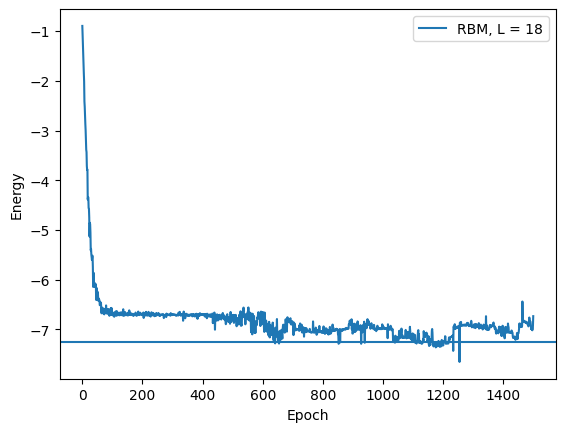

In [51]:
data_kitaev = json.load(open(f'{kitaev_path}.log'))
figure, axes = plt.subplots(1, 1)
axes.plot(data_kitaev['Energy']['iters'], data_kitaev['Energy']['Mean'], label=f'RBM, L = {kitaev.n_nodes}')
axes.axhline(y=exact_gs)
axes.set(xlabel='Epoch', ylabel='Energy')
axes.legend();

In [52]:
alpha = 3
Sz = None
lr = 0.005
shift = 0.005
n_iter = 3000
J = 0.1, 0.1, 0.8

<Axes: >

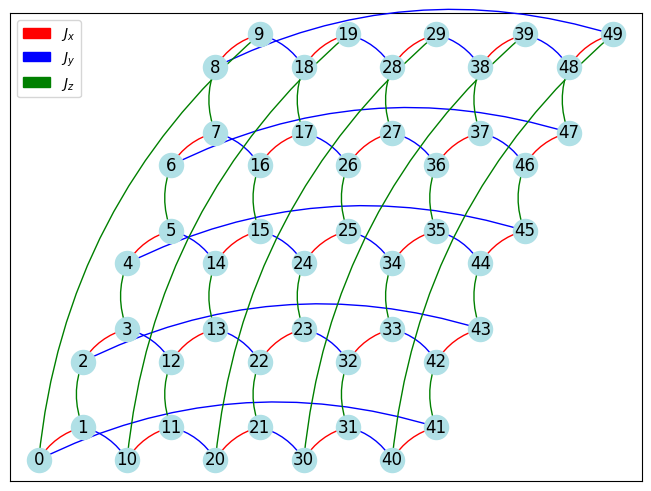

In [53]:
kitaev = nk.graph.KitaevHoneycomb(extent=[5, 5], pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=kitaev.n_nodes)
hamiltonian = Kitaev(hilbert, kitaev, J=J)
draw_kitaev_honeycomb(kitaev)

In [54]:
rbm = nk.models.RBM(alpha=alpha, param_dtype=jnp.float32)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=kitaev)
optimizer = nk.optimizer.Sgd(learning_rate=lr)
sr = nk.optimizer.SR(diag_shift=shift)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=800)
gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, preconditioner=sr, variational_state=vstate)
start = time()
gs.run(n_iter=n_iter, out=(kitaev_path := f'{res_path}/KitaevHoneycomb/N{kitaev.n_nodes}'
                          f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/3000 [00:00<?, ?it/s]

Time: 2337.465 seconds


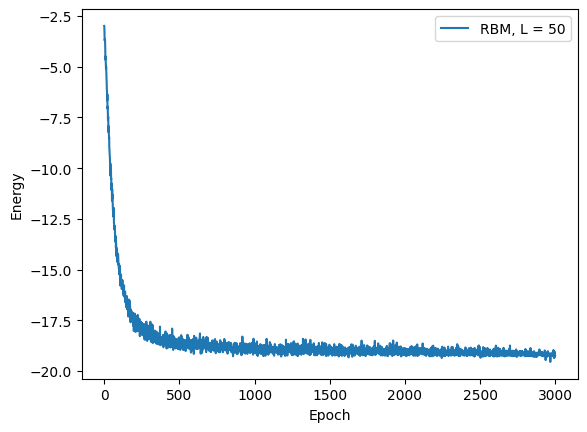

In [56]:
data_kitaev = json.load(open(f'{kitaev_path}.log'))
figure, axes = plt.subplots(1, 1)
axes.plot(data_kitaev['Energy']['iters'], data_kitaev['Energy']['Mean'], label=f'RBM, L = {kitaev.n_nodes}')
axes.set(xlabel='Epoch', ylabel='Energy')
axes.legend();